In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/can1.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Patient Id                  1000 non-null object
Age                         1000 non-null int64
Gender                      1000 non-null int64
Air Pollution               1000 non-null int64
Alcohol use                 1000 non-null int64
Dust Allergy                1000 non-null int64
OccuPational Hazards        1000 non-null int64
Genetic Risk                1000 non-null int64
chronic Lung Disease        1000 non-null int64
Balanced Diet               1000 non-null int64
Obesity                     1000 non-null int64
Smoking                     1000 non-null int64
Passive Smoker              1000 non-null int64
Chest Pain                  1000 non-null int64
Coughing of Blood           1000 non-null int64
Fatigue                     1000 non-null int64
Weight Loss                 1000 non-null int64
Shortness of Breath         1000 non-null int64
Wheezing                    1

In [3]:
print(data.head())

  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

In [4]:
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

AxesSubplot(0.125,0.125;0.775x0.755)


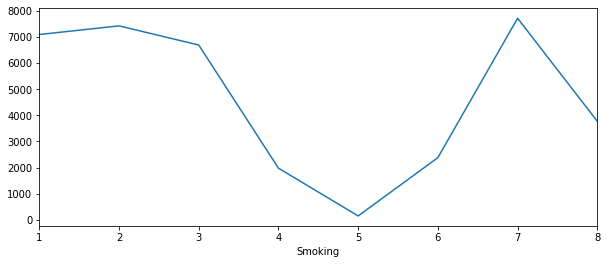

In [5]:
print(data.groupby("Smoking").sum()['Age'].plot(figsize=(10,4)))

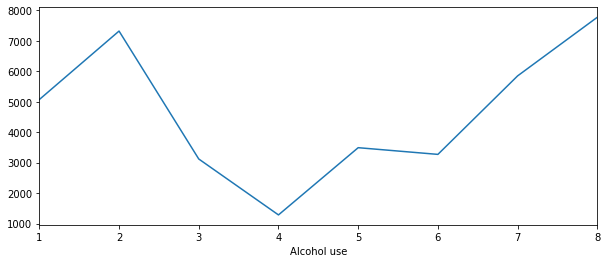

In [6]:
data.groupby("Alcohol use").sum()['Age'].plot(figsize=(10,4))

In [7]:

def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  
    width = 0.27       

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("l")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('Dry Cough','Snoring','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
temp = data[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']].loc[data['Smoking'] == 'Age']
division_data = np.asarray(data[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

C:\Users\User\Anaconda3\envs\anacondaenv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
#temp = data[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']].loc[data['Smoking'] == 'Age']
#can = np.asarray(temp[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']].loc[temp['Snoring'] == 'Gender'])
# print temp


In [10]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(X_test)
#print(y_pred)

0.942544270239548
[[7 7 7]
 [2 3 1]
 [2 4 1]
 ...
 [2 6 8]
 [2 4 3]
 [3 1 3]]


In [18]:
y_pred = clf.predict(X_test)



print((y_test, y_pred))

(array([8, 4, 2, 7, 3, 6, 6, 5, 5, 7, 7, 2, 4, 9, 6, 6, 2, 7, 7, 8, 7, 8,
       2, 6, 6, 4, 4, 4, 2, 7, 2, 4, 4, 7, 3, 7, 3, 1, 5, 3, 8, 3, 3, 1,
       3, 2, 2, 7, 5, 2, 2, 2, 2, 6, 1, 7, 7, 1, 1, 4, 8, 3, 3, 3, 3, 7,
       3, 7, 3, 4, 5, 7, 7, 3, 3, 4, 5, 5, 4, 2, 2, 1, 4, 2, 2, 1, 4, 6,
       3, 9, 6, 9, 4, 1, 5, 2, 2, 8, 5, 5, 1, 6, 3, 4, 6, 7, 7, 4, 4, 4,
       7, 4, 6, 2, 6, 7, 2, 6, 2, 6, 1, 6, 6, 7, 7, 5, 2, 3, 2, 4, 9, 2,
       7, 2, 4, 1, 7, 9, 4, 4, 6, 6, 7, 3, 7, 1, 2, 2, 2, 3, 4, 3, 8, 3,
       2, 2, 2, 3, 7, 3, 7, 7, 4, 6, 2, 4, 3, 2, 3, 6, 2, 2, 3, 7, 4, 2,
       5, 1, 4, 4, 1, 4, 1, 4, 5, 7, 2, 7, 7, 2, 6, 2, 4, 3, 2, 3, 5, 7,
       5, 7, 2, 6, 2, 7, 3, 2, 7, 7, 3, 6, 3, 4, 9, 3, 6, 2, 7, 6, 7, 2,
       7, 3, 6, 8, 7, 3, 2, 6, 3, 4, 3, 6, 7, 2, 4, 7, 5, 1, 3, 4, 1, 8,
       5, 7, 4, 1, 3, 7, 2, 6, 4, 2, 4, 2, 7, 7, 7, 3, 4, 6, 6, 3, 2, 7,
       3, 3, 4, 3, 4, 7, 7, 1, 2, 1, 1, 6, 8, 2, 4, 5, 7, 1, 4, 4, 3, 7,
       2, 3, 5, 2, 4, 7, 5, 2, 2, 8, 3, 3, 7, 2, 3

In [19]:
data['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [20]:
data.shape

(1000, 25)

In [ ]:
sns.pairplot(data, hue="Level")

In [ ]:
sns.countplot(data['Level'],label="Count")